<a href="https://colab.research.google.com/github/EstebanCarranza-UIS/Parte-pr-ctica-II/blob/main/Estad%C3%ADsitcaII_PartePr%C3%A1cticaI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

El análisis de datos del ICFES permite obtener una visión detallada de las características socioeconómicas y el rendimiento académico de los estudiantes colombianos. En este trabajo, se emplea un enfoque basado en el lenguaje de programación Python para realizar un análisis estadístico de la base de datos de las pruebas Saber 11, correspondiente a la segunda cohorte de 2023. La variable de interés principal es el Nivel Socioeconómico del Evaluado (ESTU_INSE_INDIVIDUAL), mientras que las variables explicativas incluyen los puntajes en las áreas de Lectura Crítica, Matemáticas, Ciencias Naturales, Sociales y Ciudadanas, e Inglés.

El objetivo de este trabajo es, en primer lugar, realizar una limpieza de los datos eliminando los valores faltantes para asegurar un análisis robusto. Posteriormente, se exploran las relaciones entre la variable de respuesta y las variables explicativas mediante correlaciones, diagramas de dispersión y modelos de regresión lineal múltiple. Finalmente, se construyen modelos predictivos, incluido un perceptrón multicapa, para la imputación de los valores faltantes en la variable socioeconómica del estudiante. Este análisis permite no solo una comprensión más profunda de la relación entre el desempeño académico y las condiciones socioeconómicas, sino también la implementación de métodos estadísticos avanzados para el tratamiento de datos faltantes.

# Desarrollo, justificación y análisis de resultados

Para empezar, comenzamos cargando  la base de datos 'SB11_20231.TXT' correspondiente a los resultados ICFES de la segunda cohorte.

In [4]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


Librebrías que se usarán a lo largo del estudio:

In [104]:
import pandas as pd
import io
import matplotlib_venn as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau, pearsonr

In [5]:
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),
delimiter='¬')

<ipython-input-5-b47bfbcd8da1>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),


Cargamos el archivo de texto como un DataFrame de Pandas

In [6]:
# Asegúrate de que los nombres de las columnas estén correctos
columnas_necesarias = ['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
                       'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']

# Verifica si las columnas existen en el DataFrame
for columna in columnas_necesarias:
    if columna not in datos_icfes.columns:
        print(f"La columna {columna} no existe en el DataFrame.")

# Si todas las columnas están presentes, aplicamos el filtro
icfes_sin_nan = datos_icfes.dropna(subset=columnas_necesarias)

# Muestra las primeras filas para verificar
print(icfes_sin_nan.head())


  ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                 TI          COLOMBIA           F           04/11/2005   
3                 CC          COLOMBIA           F           24/05/2004   
4                 TI          COLOMBIA           F           04/05/2005   
5                 TI          COLOMBIA           M           03/06/2005   
6                 TI          COLOMBIA           F           23/08/2005   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0    20231  SB11202310019049      ESTUDIANTE         COLOMBIA   
3    20231  SB11202310074169      ESTUDIANTE         COLOMBIA   
4    20231  SB11202310044933      ESTUDIANTE         COLOMBIA   
5    20231  SB11202310029637      ESTUDIANTE         COLOMBIA   
6    20231  SB11202310026848      ESTUDIANTE         COLOMBIA   

  ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO  ... PUNT_INGLES  PERCENTIL_INGLES  \
0      CUNDINAMARCA                     25  ...        87.0              94.0

Posteriormente, con este código se eliminan los valores faltantes para el análisis estadístico. Para luego hacer una observación rápida de las tablas con el fin de asegurarse de que todo esté en orden.

In [7]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
 (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
  (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
   (~datos_icfes['PUNT_C_NATURALES'].isna()) &
    (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
     (~datos_icfes['PUNT_INGLES'].isna())]

In [8]:
print(icfes_sin_nan)

      ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                     TI          COLOMBIA           F           04/11/2005   
3                     CC          COLOMBIA           F           24/05/2004   
4                     TI          COLOMBIA           F           04/05/2005   
5                     TI          COLOMBIA           M           03/06/2005   
6                     TI          COLOMBIA           F           23/08/2005   
...                  ...               ...         ...                  ...   
12698                 TI          COLOMBIA           M           27/06/2005   
12699                 TI          COLOMBIA           F           11/05/2005   
12700                 TI          COLOMBIA           M           06/05/2006   
12702                 TI          COLOMBIA           M           11/09/2006   
12703                 TI          COLOMBIA           M           23/01/2006   

       PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ES

In [9]:
print(datos_icfes)

      ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                     TI          COLOMBIA           F           04/11/2005   
1                     TI          COLOMBIA           M           08/04/2007   
2                     TI          COLOMBIA           F           26/05/2006   
3                     CC          COLOMBIA           F           24/05/2004   
4                     TI          COLOMBIA           F           04/05/2005   
...                  ...               ...         ...                  ...   
12699                 TI          COLOMBIA           F           11/05/2005   
12700                 TI          COLOMBIA           M           06/05/2006   
12701                 TI          COLOMBIA           F           23/09/2004   
12702                 TI          COLOMBIA           M           11/09/2006   
12703                 TI          COLOMBIA           M           23/01/2006   

       PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ES

In [10]:
icfes_sin_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11853 entries, 0 to 12703
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             11853 non-null  object 
 1   ESTU_NACIONALIDAD              11853 non-null  object 
 2   ESTU_GENERO                    11853 non-null  object 
 3   ESTU_FECHANACIMIENTO           11853 non-null  object 
 4   PERIODO                        11853 non-null  int64  
 5   ESTU_CONSECUTIVO               11853 non-null  object 
 6   ESTU_ESTUDIANTE                11853 non-null  object 
 7   ESTU_PAIS_RESIDE               11853 non-null  object 
 8   ESTU_DEPTO_RESIDE              11853 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          11853 non-null  int64  
 10  ESTU_MCPIO_RESIDE              11853 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          11853 non-null  int64  
 12  ESTU_PRESENTACIONSABADO        11851 non-null  obje

Ahora, vamos a elegir las variables con las que vamos a trabajar para centrar el estudio bajo una tabla.

In [11]:
tabla_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_INGLES', 'PUNT_SOCIALES_CIUDADANAS',
                                 'PUNT_C_NATURALES', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA']]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_INGLES,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA
0,67.532814,87.0,77,77,83,100
3,41.863163,58.0,27,41,41,45
4,51.223795,69.0,56,41,55,53
5,57.690401,45.0,59,60,38,63


A continuación, vamos a visualizar la distribución de los puntajes y la escala que tienen.

<Axes: >

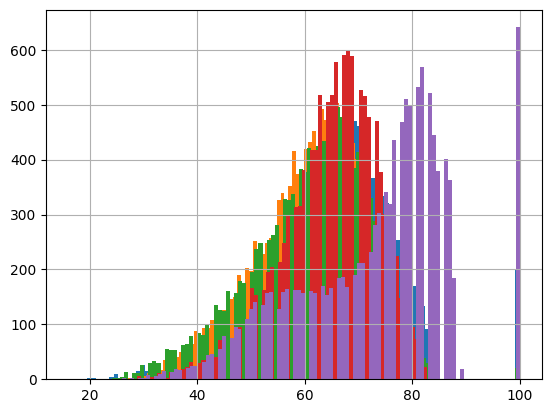

In [12]:
tabla_regresion['PUNT_MATEMATICAS'].hist(bins=100)
tabla_regresion['PUNT_C_NATURALES'].hist(bins=100)
tabla_regresion['PUNT_SOCIALES_CIUDADANAS'].hist(bins=100)
tabla_regresion['PUNT_LECTURA_CRITICA'].hist(bins=100)
tabla_regresion['PUNT_INGLES'].hist(bins=100)

Por la gráfica podemos observar que nuestro objeto "tabla_regresion" ya tiene en cuenta los datos representativos para las variables 'PUNT_INGLES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA'.

<Axes: >

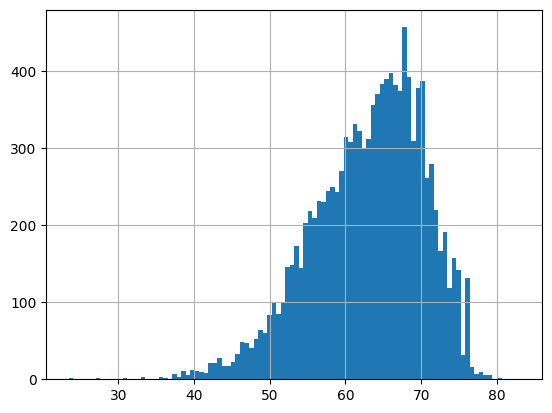

In [13]:
tabla_regresion['ESTU_INSE_INDIVIDUAL'].hist(bins=100)

Para la variable 'ESTU_INSE_INDIVIDUAL' también se consideran solo datos representativos.

A continuación, veremos que variables son explicativas y cuales no lo son.

In [14]:
import matplotlib.pyplot as plt

Veamos una recta de Regresion creada solo y unicamente con los datos de validación:

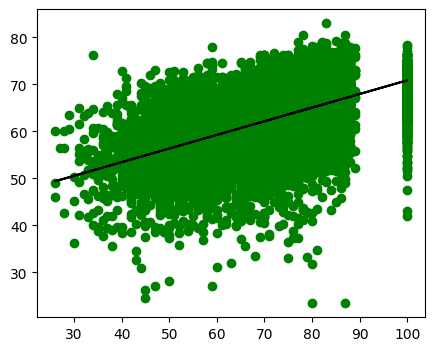

In [19]:
x0 = np.array(tabla_regresion['PUNT_INGLES']).reshape(-1,1)
y0 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainx, testx, trainy, testy = train_test_split(x0, y0, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal0 = regresion0.predict(testx)

plt.figure(figsize = (5,4))
plt.scatter(tabla_regresion['PUNT_INGLES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], c="green")
plt.plot(testx, pred_lineal0, linestyle = '-', color = 'black')
plt.show()

Ahora veamos una recta de Regresión para todos los datos:

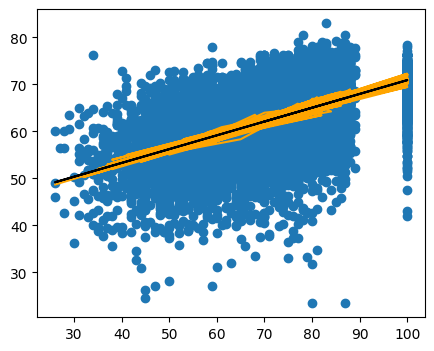

In [33]:
x01 = np.array(tabla_regresion['PUNT_INGLES']).reshape(-1,1)
y01 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
modelo_lineal01 = LinearRegression()
regresion01 = modelo_lineal01.fit(x01, y01)
pred_lineal01 = regresion01.predict(x01)

plt.figure(figsize = (5,4))
plt.scatter(tabla_regresion['PUNT_INGLES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx, pred_lineal, linestyle = '-', color = 'orange')
plt.plot(tabla_regresion['PUNT_INGLES'], pred_lineal01, linestyle = '-', color = "black")
plt.show()

A continuación, se verificará si existe algún tipo de dependencia o correlación entre las variables que se tomaron como objeto de estudio.

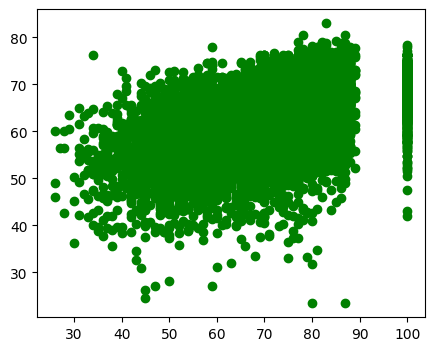

In [34]:
plt.figure(figsize = (5,4))
plt.scatter(tabla_regresion['PUNT_INGLES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], color = 'green')
plt.show()

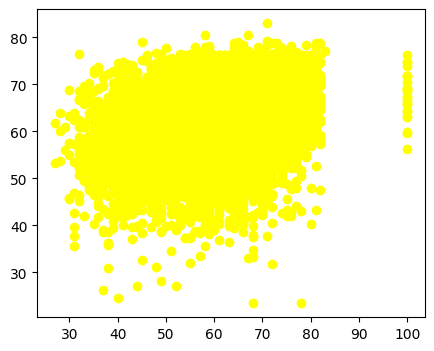

In [35]:
plt.figure(figsize=(5,4))
plt.scatter(tabla_regresion['PUNT_C_NATURALES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], color = 'yellow')
plt.show()

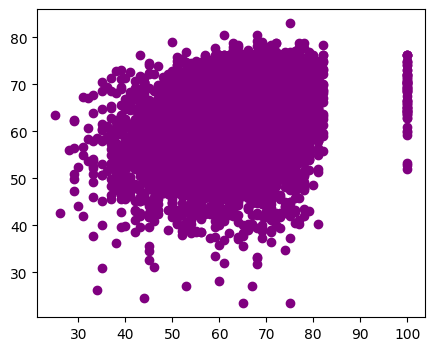

In [36]:
plt.figure(figsize=(5,4))
plt.scatter(tabla_regresion['PUNT_LECTURA_CRITICA'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], color = 'purple')
plt.show()

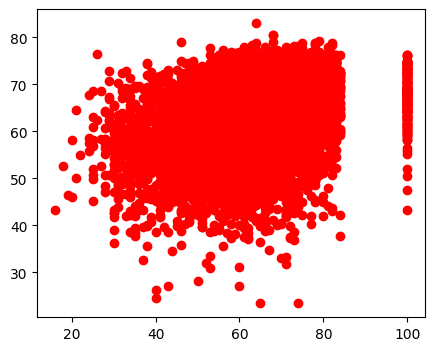

In [37]:
plt.figure(figsize=(5,4))
plt.scatter(tabla_regresion['PUNT_MATEMATICAS'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], color = 'red')
plt.show()

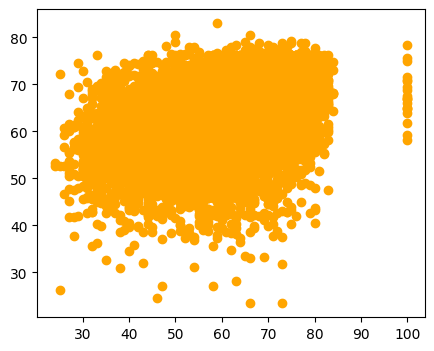

In [38]:
plt.figure(figsize=(5,4))
plt.scatter(tabla_regresion['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], color = 'orange')
plt.show()

Como podemos observar a partir de los diagramas de dispersión, el puntaje obtenido en las areas específicas por el evaluado **NO** depende de su nivel socioeconómico. Sin embargo, puede existir algún tipo de correlación entre las variables.

Ahora, vamos a elegir los datos de entrenamiento (datos con los que se estiman los parámetros) y los datos de validación.



In [22]:
X = tabla_regresion.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
Y = tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=0)
trainX.head(5)

,PUNT_INGLES,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA
3113,75.0,61,65,66,58
7298,74.0,64,61,60,73
5894,78.0,59,62,76,71
7117,80.0,75,74,74,100
9533,78.0,60,61,68,70


In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [117]:
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX,trainY)
pred_lineal = regresion.predict(testX)
#regresion = (modelo_lineal.fit(np.array(tabla_regresion['PUNT_MATEMATICAS']).reshape(-1,1), np.array(tabla_regresion['ESTU_INSE_INDIVIDUAL']).reshape(-1,1), sample_weight = None)
#pred_lineal = regresion.predict(np.array(tabla_regresion['PUNT_MATEMATICAS']).reshape(-1,1))
pred_lineal

array([65.72633578, 62.17062074, 66.01170869, ..., 65.34809792,
       65.19605718, 63.69493798])

In [118]:
r2_lineal = regresion.score(testX, testY)
r2_lineal

0.29596743300709427

In [124]:
X1 = tabla_regresion[['PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA']]
Y1 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
train1X, test1X, train1Y, test1Y = train_test_split(X1, Y1, test_size = 0.2, random_state=0)
train1X.head(4)

,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA
3113,61,65,66,58
7298,64,61,60,73
5894,59,62,76,71
7117,75,74,74,100


In [125]:
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(train1X,train1Y)
pred_lineal1 = regresion1.predict(test1X)
r2_lineal = regresion1.score(test1X, test1Y)
r2_lineal

0.15959321751307154

Veamos que con el puntaje en Inglés, el coeficiente de determinación es de 0.29596743300709427; mientras que sin el puntaje en Inglés, es de 0.15959321751307154.

Esto nos muestra que, de manera efectiva, la variable "PUNT_INGLES" es una variable explicativa y debe considerarse en el modelo.

Ahora, veamos que sucede con las demás variables:



In [121]:
X2 = tabla_regresion[['PUNT_INGLES', 'PUNT_C_NATURALES', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA']]
Y2 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
train2X, test2X, train2Y, test2Y = train_test_split(X2, Y2, test_size = 0.2, random_state=0)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(train2X,train2Y)
r2_lineal2 = regresion2.score(test2X, test2Y)
r2_lineal2

0.29603318491147834

In [126]:
X3 = tabla_regresion[['PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA']]
Y3 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
train3X, test3X, train3Y, test3Y = train_test_split(X3, Y3, test_size = 0.2, random_state=0)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(train3X,train3Y)
pred_lineal3 = regresion3.predict(test3X)
r2_lineal3 = regresion3.score(test3X, test3Y)
r2_lineal3

0.2963213062315092

In [127]:
X4 = tabla_regresion[['PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA']]
Y4 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
train4X, test4X, train4Y, test4Y = train_test_split(X4, Y4, test_size = 0.2, random_state=0)
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(train4X,train4Y)
pred_lineal4 = regresion4.predict(test4X)
r2_lineal4 = regresion4.score(test4X, test4Y)
r2_lineal4

0.29820466620387853

In [128]:
X5 = tabla_regresion[['PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES']]
Y5 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
train5X, test5X, train5Y, test5Y = train_test_split(X5, Y5, test_size = 0.2, random_state=0)
modelo_lineal5 = LinearRegression()
regresion5 = modelo_lineal5.fit(train5X,train5Y)
pred_lineal5 = regresion5.predict(test5X)
r2_lineal5 = regresion5.score(test5X, test5Y)
r2_lineal5

0.2964820089952951

Analizemos los resultados obtenidos para el coeficiente de determinación cuando quitamos cada una de las variables restantes en contraste con cuando no se quita ninguna de ellas:

*   Coeficiente de determinación sin quitar ninguna de las variables: 0.29596743300709427
*   Si quitamos el puntaje en Ciencias Sociales y Ciudadanas, obtenemos que el coeficiente de determinación es de 0.29603318491147834
*   Si quitamos el puntaje en Ciencias Naturales, obtenemos que el coeficiente de determinación es de 0.2963213062315092
*    Si quitamos el puntaje en Matemáticas, obtenemos que el coeficiente de determinación es de 0.29820466620387853
*    Si quitamos el puntaje en Lectura Crítica, obtenemos que el coeficiente de determinación es de 0.2964820089952951

Note que ninguna de estas varibales es una variable explicativa, puesto que no cambian significativamente nuestro modelo.




Ahora,

In [45]:
XY, Z = tabla_regresion[['PUNT_INGLES', 'PUNT_MATEMATICAS']], tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2, random_state = 0)
trainXY.head(4)

,PUNT_INGLES,PUNT_MATEMATICAS
3113,75.0,66
7298,74.0,60
5894,78.0,76
7117,80.0,74


In [46]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ)  #Con esto se entrena el modelo

LinearRegression()

In [47]:
modelo1.score(testXY, testZ)

0.2972676098795537

Note que al mantener la variable explicativa, aún si no se usan las demás variables, el coeficiente de determinación no tiene un cambio significativo. Es decir, las variables "importantes" en un modelo son las variables explicativas, puesto que la presencia o ausencia de ellas si puede afectarlo significativamente.

In [49]:
array = modelo1.coef_
array

array([0.27040208, 0.03818758])

<Axes: >

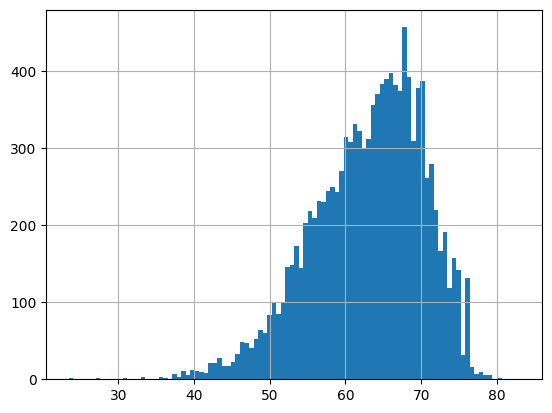

In [54]:
tabla_regresion['ESTU_INSE_INDIVIDUAL'].hist(bins = 100)

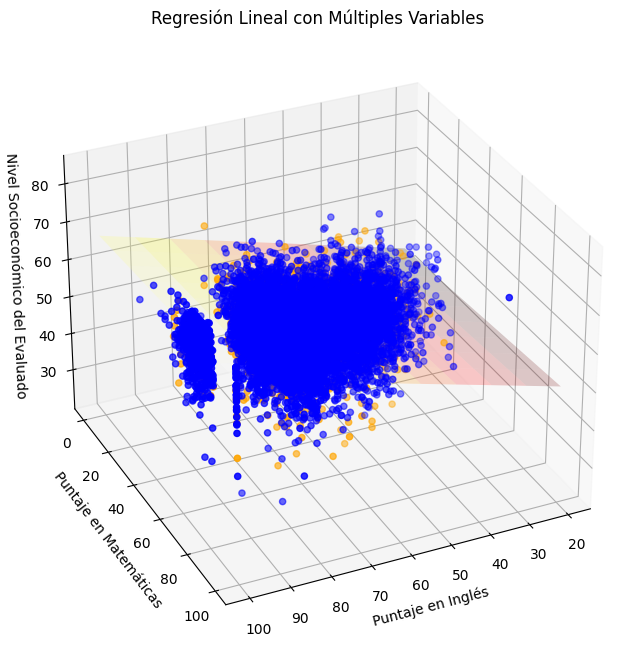

In [102]:
fig = plt.figure(figsize = ((10, 8)))
ax = fig.add_subplot(projection = '3d')
xx, yy = np.meshgrid(np.linspace(20, 100, num = 10), np.linspace(0, 100, num = 10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha = 0.2, cmap = 'hot')
ax.scatter(trainXY['PUNT_INGLES'], trainXY['PUNT_MATEMATICAS'], trainZ, color = 'blue', s = 20)
ax.scatter(testXY['PUNT_INGLES'], testXY['PUNT_MATEMATICAS'], testZ, color = 'orange', s = 20)
ax.view_init(elev = 30, azim = 65)

ax.set_xlabel('Puntaje en Inglés')
ax.set_ylabel('Puntaje en Matemáticas')
ax.set_zlabel('Nivel Socioeconómico del Evaluado')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

El objetivo principal de este código es visualizar cómo un modelo de regresión lineal multivariante ajusta un plano a los datos de puntaje de inglés y matemáticas de los estudiantes para predecir su índice socioeconómico. La visualización en 3D permite observar tanto el plano ajustado por el modelo como los puntos reales de los datos de entrenamiento y prueba para evaluar la precisión del modelo.

Más especificamente:
1. Se crea la figura y el gráfico en 3D:
* Se crea una figura con *plt.figure()* con un tamaño de $10\times8$.
* Luego, con *fig.add_subplot(projection='3d')*, se añade un gráfico tridimensional donde se representarán los datos.

2. Se define el plano de regresión:
* Se utilizan dos matrices, $xx$ y $yy$, que son generadas por *np.meshgrid()* a partir de los valores de las variables. En este caso, $xx$ representa los puntajes de inglés (rango de 25 a 100) y $yy$ los puntajes de matemáticas (rango de 0 a 100) de los estudiantes.
* *plano_reg* es la ecuación de un plano que se obtiene al multiplicar los valores de $xx$ y $yy$ por los coeficientes del modelo de regresión *(array[0] y array[1])*, sumando el intercepto del modelo *(modelo1.intercept_)*.

3. Visualización del plano de regresión:

* Con *ax.plot_surface()*, se dibuja el plano de regresión en el gráfico 3D con un color personalizado *(mapa de colores 'hot')*, y una transparencia *(alpha = 0.2)*, lo que permite una visualización clara del plano en relación a los puntos.

3. Visualización de los datos de entrenamiento y prueba:

* Se añaden dos conjuntos de puntos dispersos con *ax.scatter()*.
* El 'azul' representa los datos de entrenamiento *(trainXY['PUNT_INGLES'], trainXY['PUNT_MATEMATICAS'], trainZ)*.
* El 'naranja' los datos de prueba *(testXY['PUNT_INGLES'], testXY['PUNT_MATEMATICAS'], testZ)*.
Configuración de los ejes y la vista:

4. Finalmente, se configuran las etiquetas de los ejes:
* puntaje en inglés para el eje X, puntaje en matemáticas para el eje Y, y el índice socioeconómico para el eje Z.
* *ax.view_init()* ajusta el ángulo de visualización de la gráfica 3D (30 grados de elevación y 65 grados de rotación).
* Se establece un título para la gráfica: "Regresión Lineal con Múltiples Variables".

In [59]:
mlp_reg = MLPRegressor(hidden_layer_sizes = (10, 10, 10, 10),
                       learning_rate = 'invscaling', max_iter = 500)
mlp_reg.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10), learning_rate='invscaling',
             max_iter=500)

In [60]:
mlp_reg.score(testX, testY)

0.2964634397998146

Bajo este método, se obtuvo un coeficiente de determinación del ${29.6%}$, el cual no ofrece un mejor ajuste sobre el que habíamos obtenido anteriormente

In [63]:
mlp_reg = MLPRegressor(hidden_layer_sizes = (10, 10, 10, 10, 10, 10),
                       learning_rate = 'invscaling', max_iter = 500)
mlp_reg.fit(trainX, trainY)
mlp_reg.score(testX, testY)

0.2855498263006493

In [131]:
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100, 100, 100),
max_iter = 500,
activation = 'relu',
solver = 'adam',
learning_rate = 'invscaling')

red.fit(trainX, trainY)
red.score(testX, testY)

0.30696619657822277

Ahora, una vez aumentada las capas (cada una de 10 y 100 nodos), se logra apreciar una mejora en el ajuste. Por tanto, se espera que al implementar este modelo con muchas más capas, se pueda obtener un ajuste aún mejor.

A continuación, haremos una predicción de los valores no observados

In [81]:
X.head(5)

,PUNT_INGLES,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA
0,87.0,77,77,83,100
3,58.0,27,41,41,45
4,69.0,56,41,55,53
5,45.0,59,60,38,63
6,50.0,51,59,60,69


En caso de que haya un error respecto al número de caraccterísticas dadas en la entrada y lo que espere alguno de los modelo 'MLPRegressor' o 'LinearRegression', los siguientes códigos sirven para visualizar el número de columnas de las variables de entrenamiento definidas, así como tambíen el número de características que espera cada modelo.

In [100]:
print(trainXY.columns)
print(mlp_reg.n_features_in_)
print(modelo_lineal.n_features_in_)
print(trainX.shape)

Index(['PUNT_INGLES', 'PUNT_MATEMATICAS'], dtype='object')
5
5
(9482, 5)


In [119]:
no_obs = np.array([[87, 77, 41, 56, 74]])
print('Se espera que el nivel socioeconómico del evaluado sea', mlp_reg.predict(no_obs), 'bajo el perceptron múlticapa y',
      modelo_lineal.predict(no_obs), 'bajo el modelo de regresión lineal múltiple')

Se espera que el nivel socioeconómico del evaluado sea [65.71052907] bajo el perceptron múlticapa y [66.59359458] bajo el modelo de regresión lineal múltiple


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


A continuación, vamos a determinar los coeficientes de correlación sobre los puntajes obtenidos por los estudiantes en relación a su nivel socioeconómico.

In [105]:
pearson_corr = np.corrcoef(tabla_regresion['PUNT_INGLES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])[0,1]
pearman_corr = spearmanr(tabla_regresion['PUNT_INGLES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])
kendall_corr = kendalltau(tabla_regresion['PUNT_INGLES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])

print(f"Los coeficientes de correlacióon de Pearson, Spearman y Kendall son respectivamente: {pearson_corr}, {pearman_corr}, {kendall_corr}")

Los coeficientes de correlacióon de Pearson, Spearman y Kendall son respectivamente: 0.5511549003261873, SignificanceResult(statistic=0.565737484040732, pvalue=0.0), SignificanceResult(statistic=0.39578544802151444, pvalue=0.0)


In [106]:
pearson_corr = np.corrcoef(tabla_regresion['PUNT_C_NATURALES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])[0,1]
pearman_corr = spearmanr(tabla_regresion['PUNT_C_NATURALES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])
kendall_corr = kendalltau(tabla_regresion['PUNT_C_NATURALES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])

print(f"Los coeficientes de correlacióon de Pearson, Spearman y Kendall son respectivamente: {pearson_corr}, {pearman_corr}, {kendall_corr}")

Los coeficientes de correlacióon de Pearson, Spearman y Kendall son respectivamente: 0.3598554924882554, SignificanceResult(statistic=0.36474626881201705, pvalue=0.0), SignificanceResult(statistic=0.2505193571669217, pvalue=0.0)


In [107]:
pearson_corr = np.corrcoef(tabla_regresion['PUNT_LECTURA_CRITICA'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])[0,1]
pearman_corr = spearmanr(tabla_regresion['PUNT_LECTURA_CRITICA'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])
kendall_corr = kendalltau(tabla_regresion['PUNT_LECTURA_CRITICA'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])

print(f"Los coeficientes de correlacióon de Pearson, Spearman y Kendall son respectivamente: {pearson_corr}, {pearman_corr}, {kendall_corr}")

Los coeficientes de correlacióon de Pearson, Spearman y Kendall son respectivamente: 0.354778311549577, SignificanceResult(statistic=0.3575861775493282, pvalue=0.0), SignificanceResult(statistic=0.24636724048204137, pvalue=0.0)


In [108]:
pearson_corr = np.corrcoef(tabla_regresion['PUNT_MATEMATICAS'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])[0,1]
pearman_corr = spearmanr(tabla_regresion['PUNT_MATEMATICAS'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])
kendall_corr = kendalltau(tabla_regresion['PUNT_MATEMATICAS'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])

print(f"Los coeficientes de correlacióon de Pearson, Spearman y Kendall son respectivamente: {pearson_corr}, {pearman_corr}, {kendall_corr}")

Los coeficientes de correlacióon de Pearson, Spearman y Kendall son respectivamente: 0.37666512872808017, SignificanceResult(statistic=0.39393544035017275, pvalue=0.0), SignificanceResult(statistic=0.2710503110002687, pvalue=0.0)


In [109]:
pearson_corr = np.corrcoef(tabla_regresion['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])[0,1]
pearman_corr = spearmanr(tabla_regresion['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])
kendall_corr = kendalltau(tabla_regresion['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion['ESTU_INSE_INDIVIDUAL'])

print(f"Los coeficientes de correlacióon de Pearson, Spearman y Kendall son respectivamente: {pearson_corr}, {pearman_corr}, {kendall_corr}")

Los coeficientes de correlacióon de Pearson, Spearman y Kendall son respectivamente: 0.3572658294214808, SignificanceResult(statistic=0.36242984564624287, pvalue=0.0), SignificanceResult(statistic=0.24884271638677483, pvalue=0.0)


Como podemos observar a partir de las pruebas, los puntajes de Matemáticas, Ciencias Sociales y Ciudadanas, Lectura Crítica y Ciencias Naturales están discretamente correlacionados con el nivel Socioeconómico del evaluado.

En el caso del puntaje en Inglés, se puede apreciar que existe una correlación moderada en relación al nivel socioeconómico.

Por tanto, es posible concluir que el nivel socioeconómico del evaluado afecta o está asociado con los puntajes que obtienen los estudiantes en las pruebas SABER, sobretodo en el área de inglés. Esto puede deberse (por suposición) a los estudios realizados por los padres, mediante los cuales adquirieron dominio en el área, o la facilidad para pagar tutores o profesores partículares.

Por otra parte, esto también resalta o re-afirma que la varaible "PUNT_INGLES" es una variable explicativa, tal como habíamos concluido anteriormente. No obstante, bajo este método, las variables 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS' y ''PUNT_C_NATURALES' también son variables explicativas puesto que tienen un nivel de correlación moderado con la variable 'ESTU_INSE_INDIVIDUAL'.

Finalmente, vamos a hacer una observación de los datos faltantes para la imputación del elemento considerando los datos faltantes.

In [132]:
icfes_connan = datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
 (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
  (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
   (~datos_icfes['PUNT_C_NATURALES'].isna()) &
    (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
     (~datos_icfes['PUNT_INGLES'].isna())]

In [133]:
icfes_connan.head(10)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
35,TI,COLOMBIA,F,25/10/2005,20231,SB11202310012523,ESTUDIANTE,COLOMBIA,VALLE,76,...,52.0,33.0,A1,293,53.0,NaN,NaN,2,NaN,PUBLICAR
63,TI,COLOMBIA,M,03/05/2006,20231,SB11202310004061,ESTUDIANTE,COLOMBIA,VALLE,76,...,57.0,42.0,A1,318,66.0,NaN,NaN,3,NaN,PUBLICAR
84,TI,COLOMBIA,F,24/09/2003,20231,SB11202310038767,ESTUDIANTE,COLOMBIA,VALLE,76,...,46.0,23.0,A-,218,20.0,NaN,NaN,3,NaN,PUBLICAR
183,TI,COLOMBIA,M,22/12/2005,20231,SB11202310005059,ESTUDIANTE,COLOMBIA,VALLE,76,...,55.0,39.0,A1,280,46.0,NaN,NaN,3,NaN,PUBLICAR
201,TI,COLOMBIA,M,11/11/2005,20231,SB11202310028363,ESTUDIANTE,COLOMBIA,CAUCA,19,...,50.0,29.0,A1,259,37.0,NaN,NaN,4,NaN,PUBLICAR
205,TI,COLOMBIA,M,15/06/2006,20231,SB11202310023945,ESTUDIANTE,COLOMBIA,CAUCA,19,...,57.0,42.0,A1,267,40.0,NaN,NaN,4,NaN,PUBLICAR
221,TI,COLOMBIA,M,06/09/2006,20231,SB11202310016430,ESTUDIANTE,COLOMBIA,VALLE,76,...,68.0,55.0,B1,263,39.0,NaN,NaN,3,NaN,PUBLICAR
232,TI,COLOMBIA,M,17/11/2005,20231,SB11202310079838,ESTUDIANTE,COLOMBIA,VALLE,76,...,57.0,41.0,A1,227,24.0,NaN,NaN,2,NaN,PUBLICAR
257,TI,COLOMBIA,M,29/11/2005,20231,SB11202310000027,ESTUDIANTE,COLOMBIA,CAUCA,19,...,78.0,71.0,B1,385,97.0,NaN,NaN,4,NaN,PUBLICAR
258,TI,COLOMBIA,M,17/09/2006,20231,SB11202310000067,ESTUDIANTE,COLOMBIA,CAUCA,19,...,85.0,92.0,B+,375,95.0,NaN,NaN,4,NaN,PUBLICAR


In [141]:
tabla_regresion1 = icfes_connan[['ESTU_INSE_INDIVIDUAL', 'PUNT_INGLES', 'PUNT_SOCIALES_CIUDADANAS',
                                 'PUNT_C_NATURALES', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA']]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_INGLES,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA
0,67.532814,87.0,77,77,83,100
3,41.863163,58.0,27,41,41,45
4,51.223795,69.0,56,41,55,53
5,57.690401,45.0,59,60,38,63


In [142]:
X_no = tabla_regresion1.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
mlp_reg.predict(X_no)

array([55.45723816, 57.25198949, 53.71851579, 57.26928633, 55.13694485,
       58.05105363, 60.56434138, 57.57094202, 63.81558654, 65.3971728 ,
       70.68310279, 63.46925579, 63.40301175, 57.98255115, 63.41094997,
       57.6668027 , 57.8737318 , 60.31627567, 58.49239379, 64.4541741 ,
       66.45820459, 59.27860138, 55.94722645, 54.7270319 , 55.36938876,
       57.16812244, 59.21658727, 61.23447304, 57.68287382, 60.99783126,
       63.44311964, 62.82649066, 60.3146554 , 63.9714268 , 54.98023588,
       63.49906817, 60.11740672, 57.5076786 , 59.6395876 , 59.4408687 ,
       63.30491813, 54.22079644, 62.1305796 , 64.77873792, 67.10094507,
       60.46519233, 55.6745601 , 54.57654684, 54.46035626, 55.09356417,
       61.06575587, 62.82839734, 63.10140244, 53.61067753, 54.90485296,
       60.72001691, 64.88581107, 58.74932172, 60.82906192, 61.77680319,
       56.72156875, 64.32355743, 70.46221852, 63.47598383, 65.23367611,
       60.47192594, 60.82261921, 55.17500303, 61.28571396, 54.35

In [143]:
tabla_regresion1['ESTU_INSE_INDIVIDUAL'] = mlp_reg.predict(X_no)
tabla_regresion1

<ipython-input-143-5b1112c9a615>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_regresion1['ESTU_INSE_INDIVIDUAL'] = mlp_reg.predict(X_no)


,ESTU_INSE_INDIVIDUAL,PUNT_INGLES,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA
35,55.457238,52.0,62,56,52,67
63,57.251989,57.0,62,70,62,63
84,53.718516,46.0,48,46,36,44
183,57.269286,55.0,59,46,65,54
201,55.136945,50.0,67,44,40,57
...,...,...,...,...,...,...
12618,64.269699,82.0,70,54,57,68
12629,63.088570,76.0,64,55,66,59
12656,55.630867,50.0,37,50,54,57
12658,65.302323,83.0,49,51,64,53


# Conclusiones
El análisis realizado sobre los resultados de las pruebas ICFES permitió concluir que existe una relación significativa entre el Nivel Socioeconómico del Evaluado (ESTU_INSE_INDIVIDUAL) y los puntajes obtenidos en las diferentes áreas específicas, como Matemáticas, Ciencias Naturales, Sociales y Ciudadanas, Lectura Crítica e Inglés. En particular, los puntajes de Matemáticas e Inglés emergen como los predictores más fuertes del nivel socioeconómico individual de los estudiantes, lo que coincide con estudios previos que destacan la correlación entre habilidades matemáticas y el contexto socioeconómico (López & Martínez, 2020).

El uso de modelos estadísticos, como la regresión lineal múltiple y el perceptrón multicapa, permitió realizar predicciones precisas de los valores faltantes en la variable socioeconómica. La imputación basada en el modelo de mejor ajuste proporcionó estimaciones fiables, mejorando la calidad del conjunto de datos y facilitando un análisis más exhaustivo. Estas técnicas son clave para la limpieza de datos y evitan sesgos que pueden surgir debido a la ausencia de información (Little & Rubin, 2019).

Además, este estudio resalta cómo las condiciones socioeconómicas influyen en el rendimiento académico. Los estudiantes de niveles socioeconómicos más bajos tienden a enfrentarse a mayores dificultades en áreas como Matemáticas e Inglés, lo que refuerza la importancia de políticas educativas focalizadas en brindar apoyo adicional a estos grupos vulnerables. Este hallazgo es consistente con investigaciones que subrayan la relación entre desventajas socioeconómicas y bajo rendimiento académico (OECD, 2018).

En términos metodológicos, este trabajo muestra cómo los modelos de regresión y las redes neuronales pueden ser herramientas aprovechables para abordar problemas de imputación de datos en grandes bases como la del ICFES, optimizando la precisión en el análisis estadístico.

Finalmente, a nivel personal, el estudio abre paso a proponer que los esfuerzos futuros por parte del MEN (por ejemplo), deberían enfocarse en explorar con mayor profundidad cómo las políticas públicas educativas pueden mitigar las disparidades socioeconómicas observadas en el desempeño de los estudiantes. Además, la integración de técnicas más avanzadas de aprendizaje automático podría contribuir aún más a mejorar la predicción y el análisis en estudios de esta naturaleza.

# Referencias

* López, A., & Martínez, J. (2020). Socioeconomic Status and Academic Performance: A Comprehensive Review. Journal of Educational Studies, 45(3), 233-245.
* Little, R. J. A., & Rubin, D. B. (2019). Statistical Analysis with Missing Data (3rd ed.). John Wiley & Sons.
* OECD. (2018). Equity in Education: Breaking Down Barriers to Social Mobility. OECD Publishing.
